# تمرین کامپیوتری چهارم - Machine Learning
#  نیما مدیرکیاسرایی 810198471

## هدف پروژه 
<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir"  size=3>
در این تمرین کامپیوتری هدف آشنایی با روش های یادگیری ماشین و تخمین داشتن دیابت بر اساس مجموعه داده جمع آوری شده با کمک کتابخانه Scikit-Learn است که 4 فاز دارد :
    
    1) بررسی مجموعه داده
    
    2) پیش پردازش مجموعه داده
    
    3)آموزش، ارزیابی و تنظیم
    
    4)روش های یادگیری جمعی
</font>
</p>

# بررسی  مجموعه داده

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,plot_confusion_matrix

# 1)

In [2]:
train = pd.read_csv('diabetes.csv')
train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0,1
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,0
2,NaN,183.0,64.0,0.0,0.0,23.3,0.672,32.0,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0
4,NaN,137.0,40.0,35.0,168.0,NaN,NaN,33.0,1


In [3]:
train.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               635 non-null    float64
 1   Glucose                   654 non-null    float64
 2   BloodPressure             680 non-null    float64
 3   SkinThickness             624 non-null    float64
 4   Insulin                   680 non-null    float64
 5   BMI                       684 non-null    float64
 6   DiabetesPedigreeFunction  590 non-null    float64
 7   Age                       655 non-null    float64
 8   Outcome                   768 non-null    int64  
dtypes: float64(8), int64(1)
memory usage: 54.1 KB


<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir"  size=3>
طبق متد info نوع دیتای موجود در هر ستون ، سایز دیتاست و تعداد دیتای non-null در هر ستون مشخص می شود.
</font>
</p>

In [4]:
train.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,635.000000,654.000000,680.000000,624.000000,680.000000,684.000000,590.000000,655.000000,768.000000
mean,3.700787,113.422018,68.786765,20.386218,80.123529,32.083626,0.466676,33.157252,0.348958
std,3.518126,202.816831,19.724841,15.987049,115.681140,7.800741,0.322408,13.829831,0.476951
min,-22.000000,-5000.000000,-2.000000,0.000000,0.000000,0.000000,0.078000,-150.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.375000,0.243250,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,34.000000,32.300000,0.368000,29.000000,0.000000
75%,6.000000,140.750000,80.000000,32.000000,129.250000,36.600000,0.611500,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.329000,81.000000,1.000000


<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir"  size=3>
طبق متد describe برخی مشخصه های آماری هر ستون مانند تعداد دیتاهای موجود ، میانگین ، انحراف معیار ، مینیمم ، ماکزیمم ، چارک اول ، میانه و چارک سوم آورده می شود.
</font>
</p>

# 2)

In [5]:
train.isna().sum()

Pregnancies                 133
Glucose                     114
BloodPressure                88
SkinThickness               144
Insulin                      88
BMI                          84
DiabetesPedigreeFunction    178
Age                         113
Outcome                       0
dtype: int64

In [6]:
train.isna().sum()/len(train)

Pregnancies                 0.173177
Glucose                     0.148438
BloodPressure               0.114583
SkinThickness               0.187500
Insulin                     0.114583
BMI                         0.109375
DiabetesPedigreeFunction    0.231771
Age                         0.147135
Outcome                     0.000000
dtype: float64

# 3)

<AxesSubplot:>

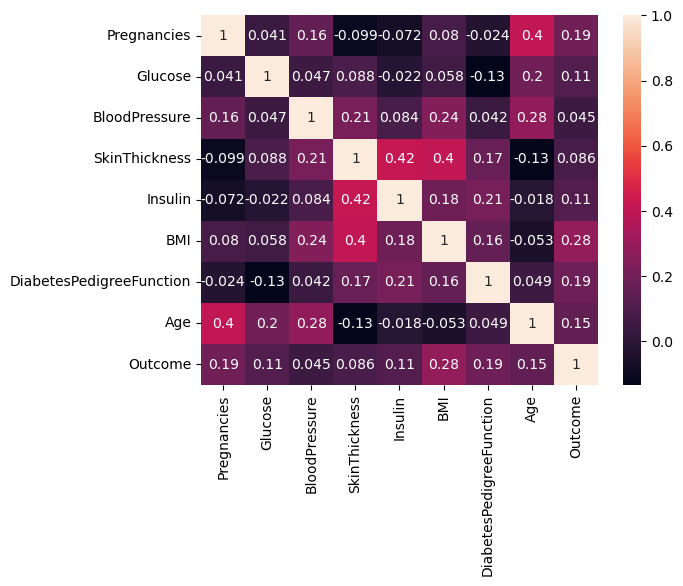

In [7]:
sns.heatmap(train.corr(), annot = True)

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir"  size=3>
طبق نمودار بالا و عدد های داخل آن می توانیم ببینیم که ویژگی های BMI ، DiabetespedigreeFunction و Pregnancies بیشترین وابستگی را به نتیجه دارند. همچنین می توان مشاهده کرد که ویژگی های BloodPressure و SkinThickness کمترین وابستگی را به نتیجه دارند.
</font>
</p>

# 4)

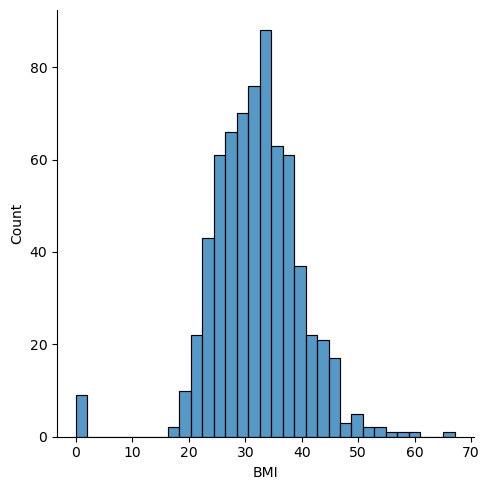

In [8]:
sns.displot(train['BMI'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='BMI', ylabel='count'>

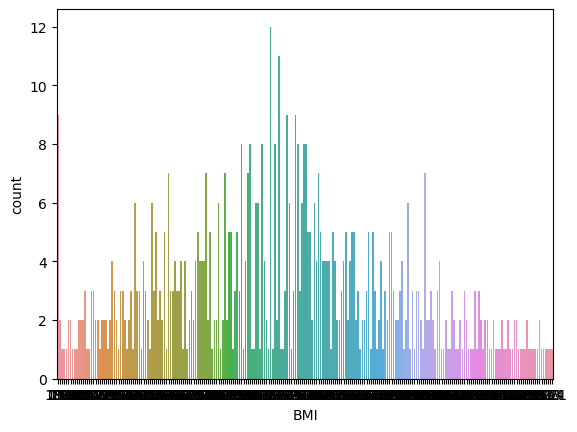

In [9]:
sns.countplot(train['BMI'])

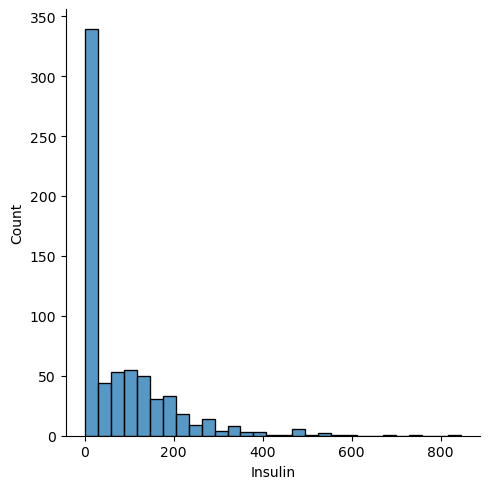

In [10]:
sns.displot(train['Insulin'])

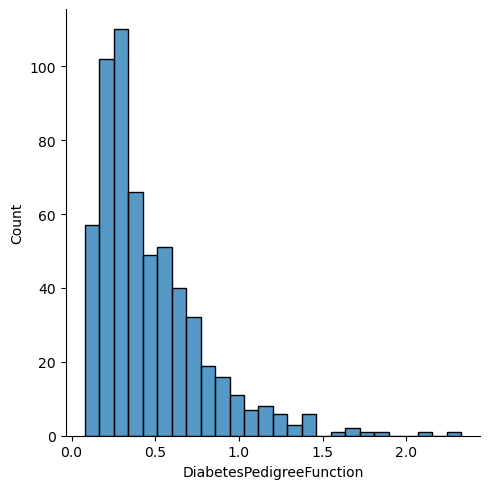

In [11]:
sns.displot(train['DiabetesPedigreeFunction'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='DiabetesPedigreeFunction', ylabel='count'>

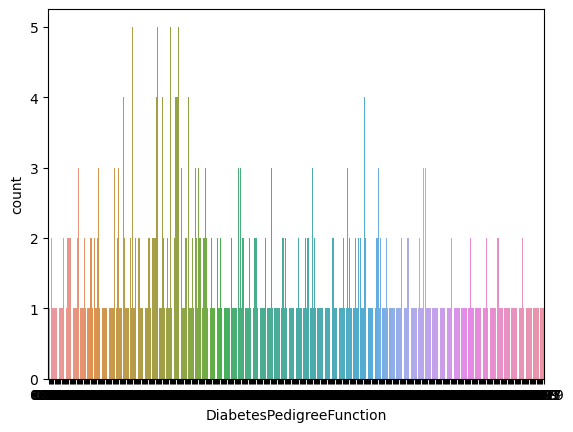

In [12]:
sns.countplot(train['DiabetesPedigreeFunction'])

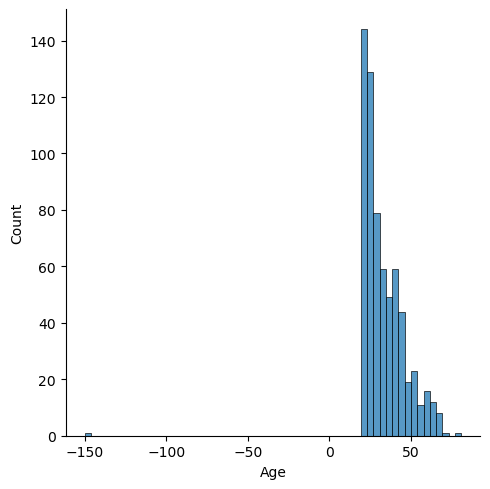

In [13]:
sns.displot(train['Age'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age', ylabel='count'>

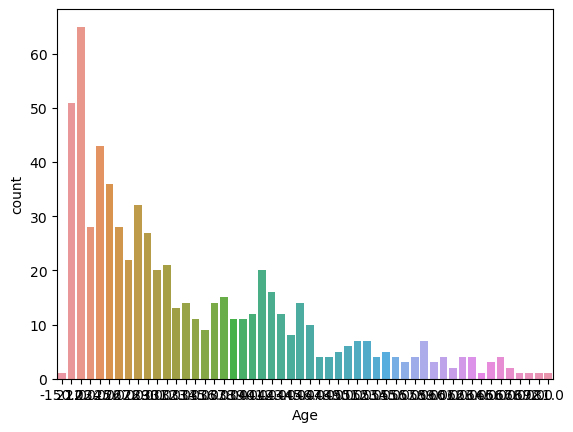

In [14]:
sns.countplot(train['Age'])

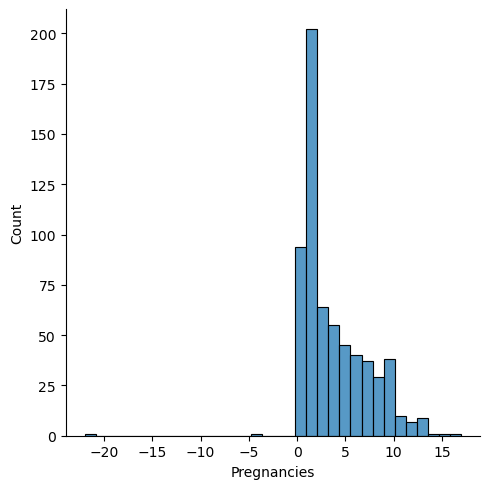

In [15]:
sns.displot(train['Pregnancies'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Pregnancies', ylabel='count'>

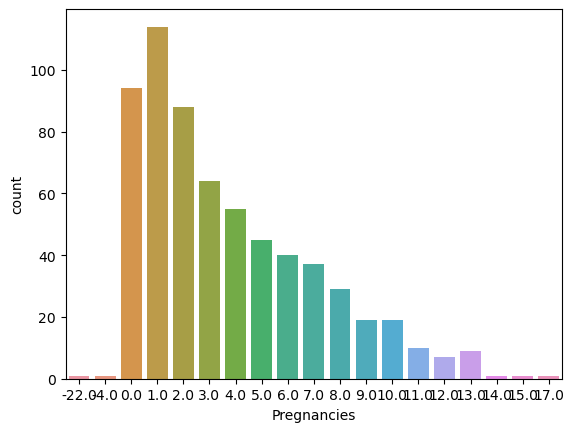

In [16]:
sns.countplot(train['Pregnancies'])

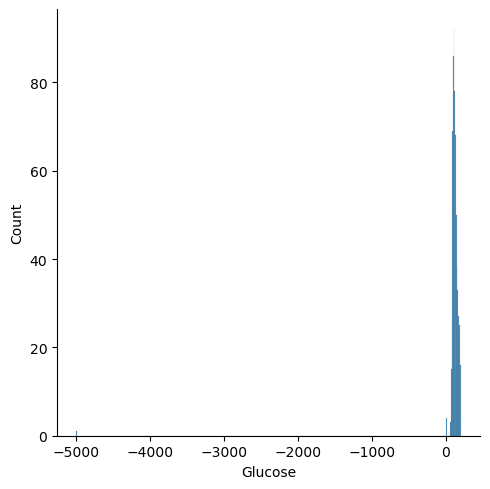

In [17]:
sns.displot(train['Glucose'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Glucose', ylabel='count'>

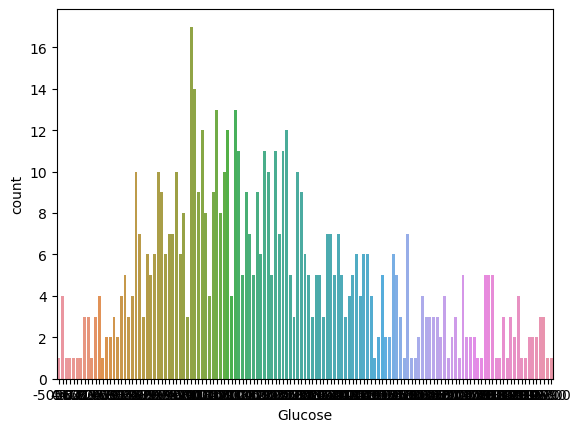

In [18]:
sns.countplot(train['Glucose'])

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir"  size=3>
طبق نمودار های بالا می توانیم مشاهده کنیم که بعضی از داده ها توزیع نرمال دارند اما بعضی از آنها به یک سمت چولگی زیادی دارند.(عدم تقارن توزیع)
</font>
</p>

# 5)

<AxesSubplot:xlabel='BMI', ylabel='Outcome'>

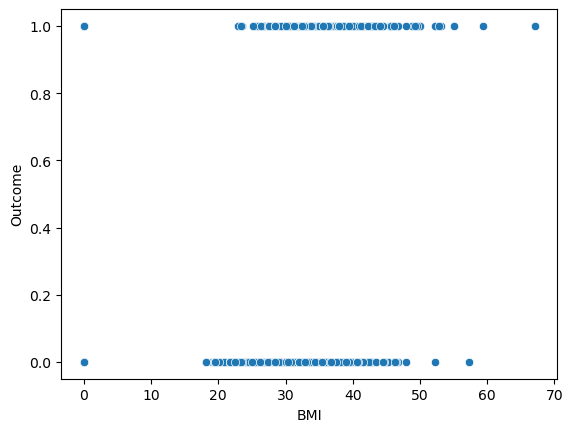

In [19]:
sns.scatterplot(x = 'BMI', y = 'Outcome', data = train)

<AxesSubplot:xlabel='Insulin', ylabel='Outcome'>

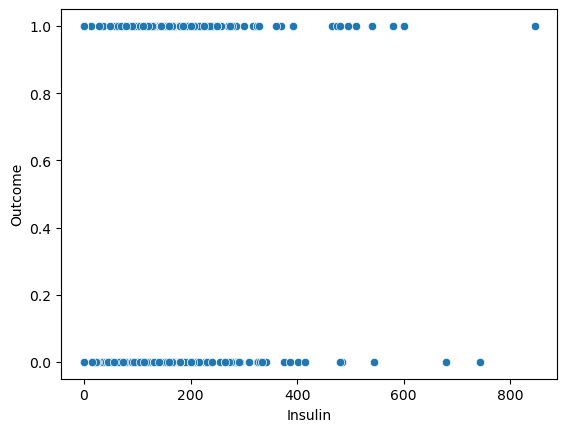

In [20]:
sns.scatterplot(x = 'Insulin', y = 'Outcome', data = train)

<AxesSubplot:xlabel='DiabetesPedigreeFunction', ylabel='Outcome'>

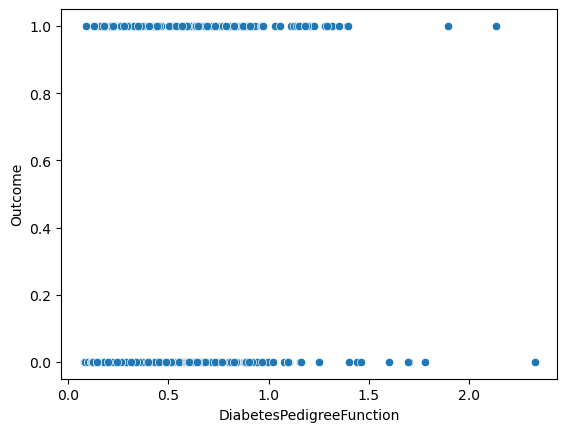

In [21]:
sns.scatterplot(x = 'DiabetesPedigreeFunction', y = 'Outcome', data = train)

<AxesSubplot:xlabel='Age', ylabel='Outcome'>

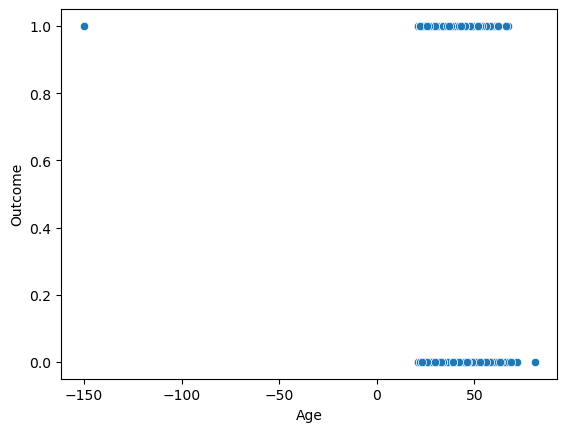

In [22]:
sns.scatterplot(x = 'Age', y = 'Outcome', data = train)

<AxesSubplot:xlabel='Pregnancies', ylabel='Outcome'>

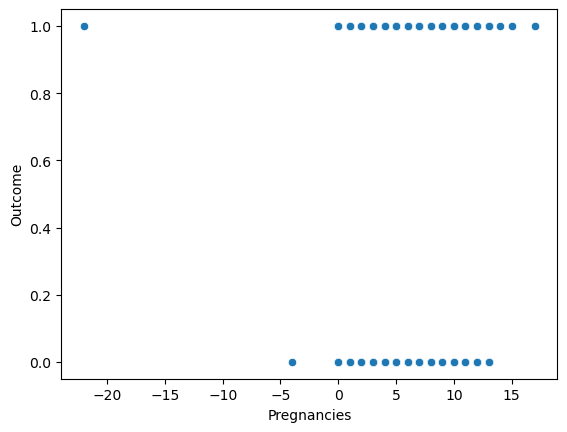

In [23]:
sns.scatterplot(x = 'Pregnancies', y = 'Outcome', data = train)

# 6)

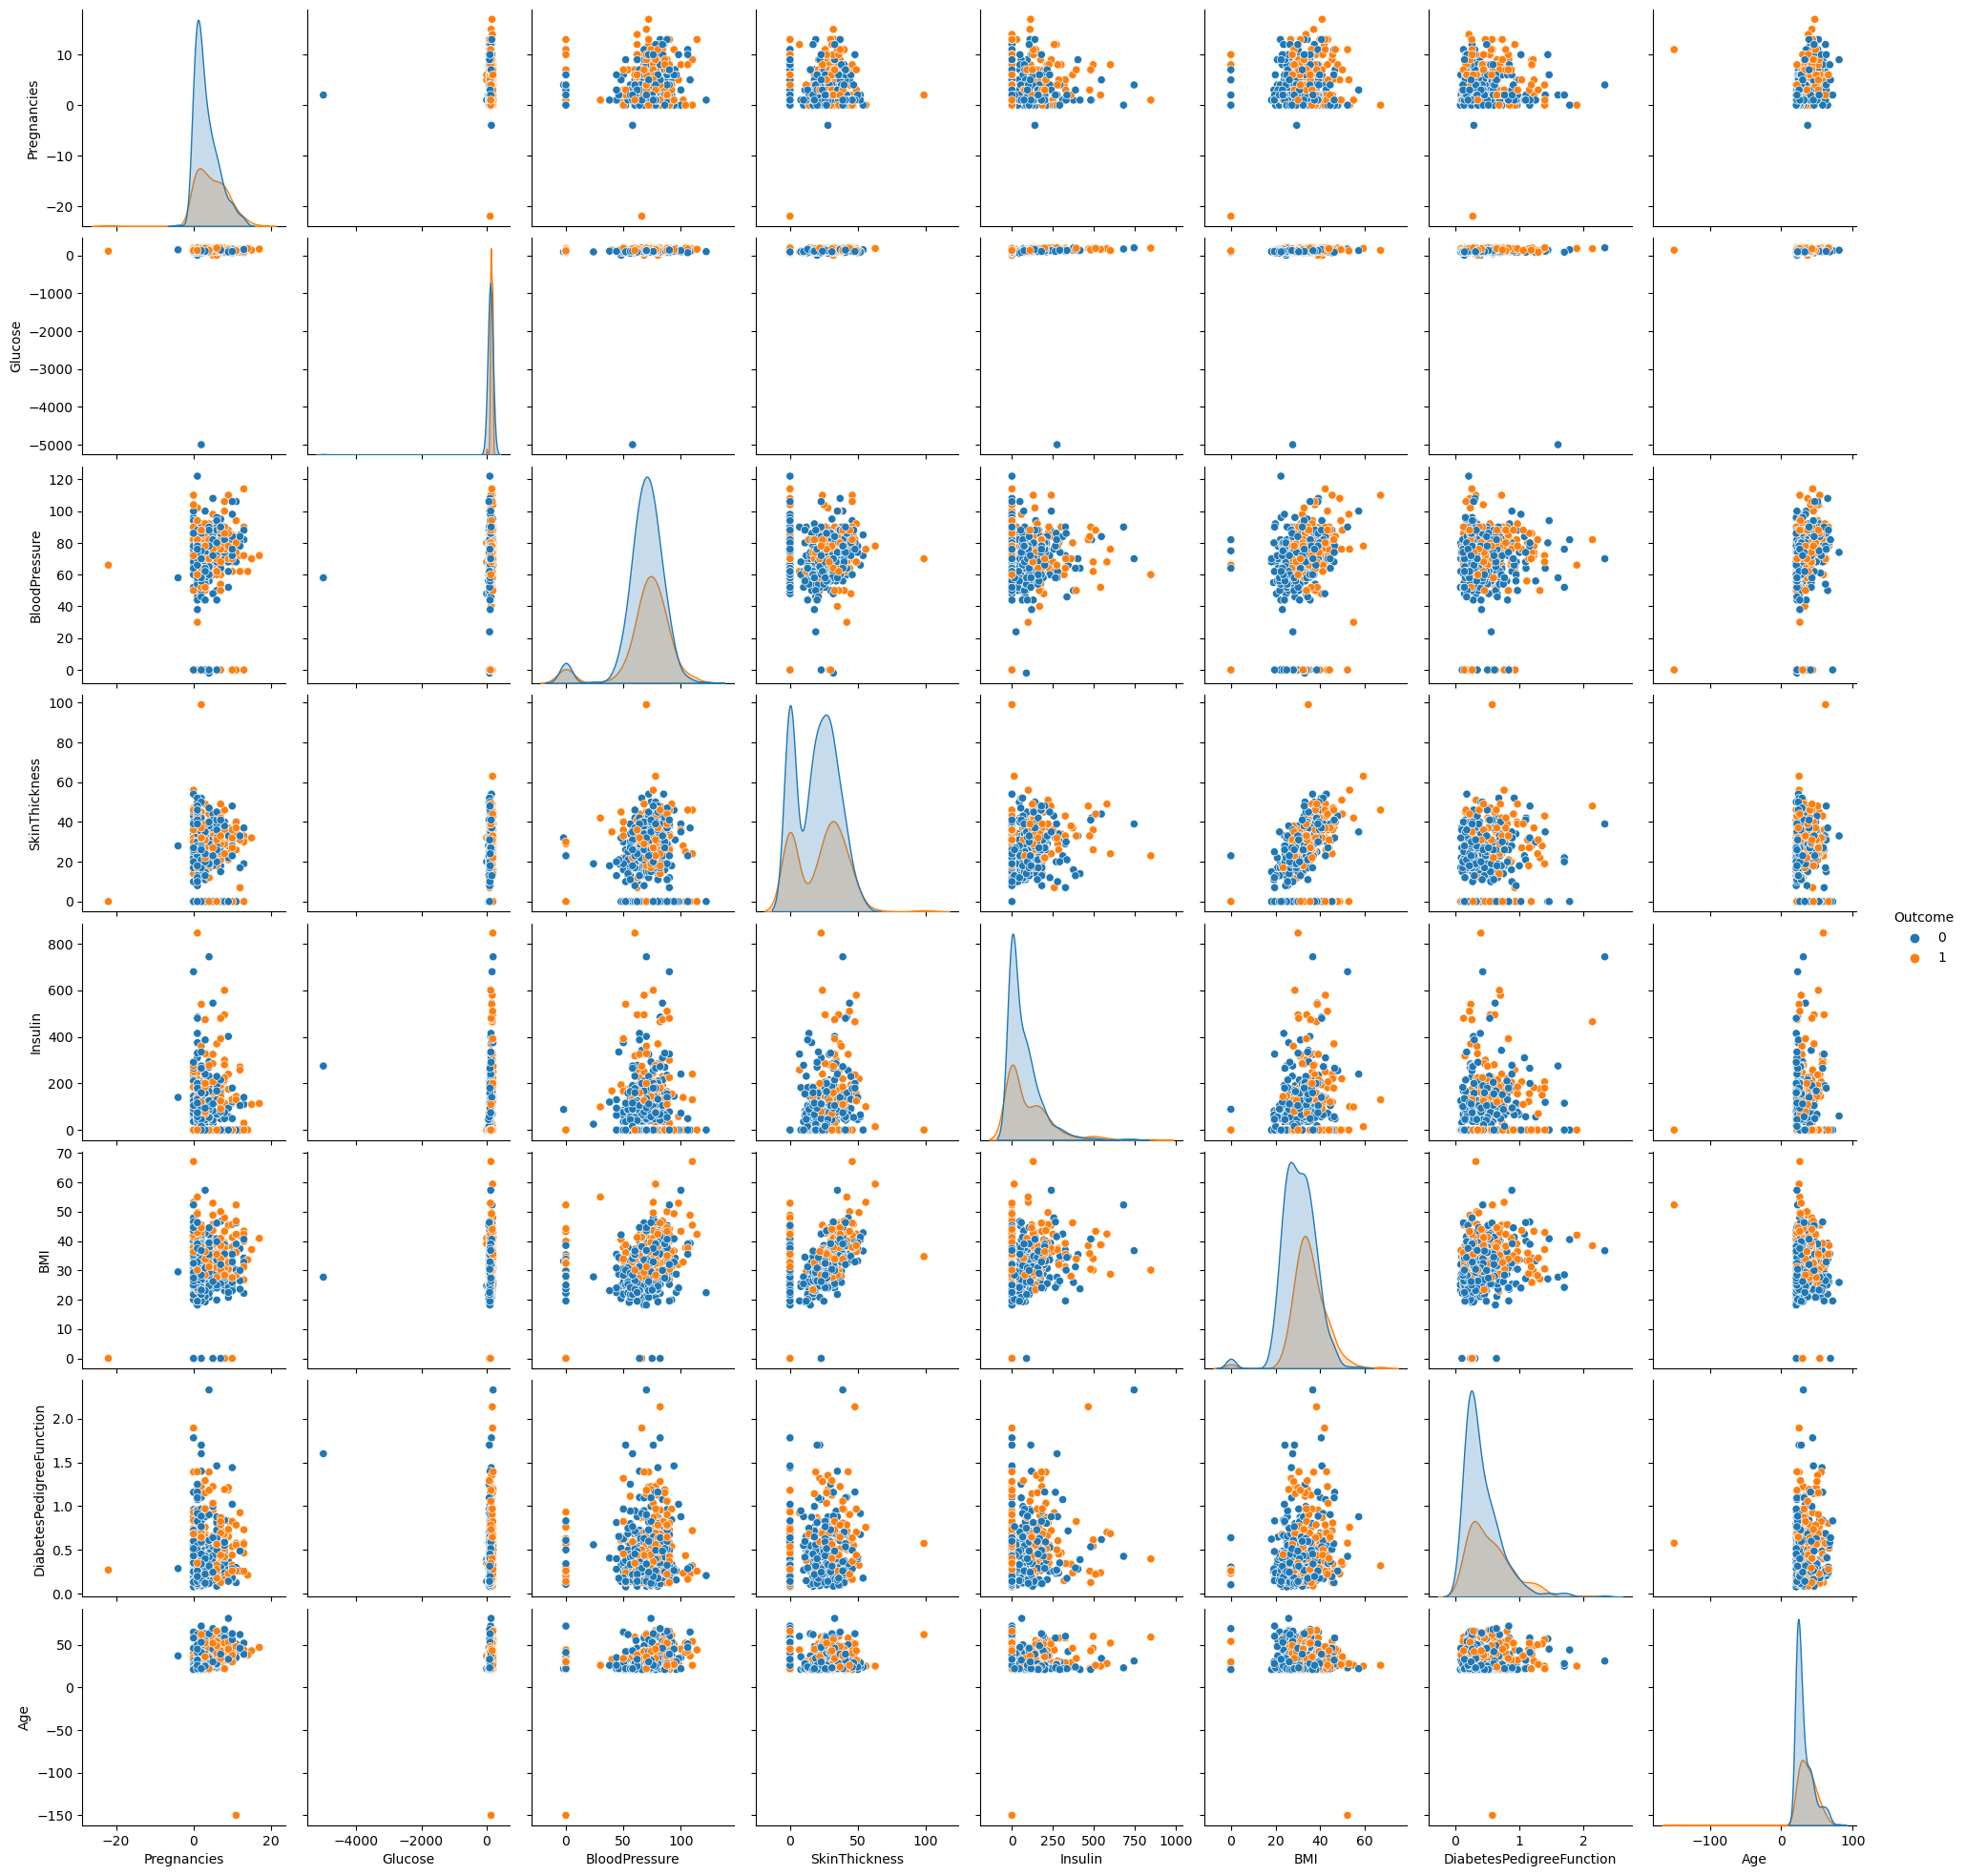

In [24]:
sns.pairplot(data = train , hue='Outcome')

# پیش پردازش مجموعه داده

# 1 & 2)

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir"  size=3>
به جز روش هایی که در صورت پروژه برای حل مشکل missing values گفته شد(حذف کل ستون یا پر کردن مقادیر خالی با آماره ها) ، روش های دیگری هست که در ادامه به آنها می پردازیم :
</font>
</p>

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir"  size=3>
1) Iterative Imputer

این روش برای دیتاهایی استفاده می شود که دیتاهای حداقل دو یا چند به هم دیگر مرتبط باشند و وابستگی خوبی داشته باشند. روش انجام این کار نیز به این صورت است که هر کدام از سطرهایی که در آن حداقل یک missing value وجود دارد را در نظر می گیرد و با توجه به بقیه دیتاهای موجود در آن سطرکه missing نیستند ، یک مدل رگرسیون درست می کند و با توجه به این مدل ، مقادیر missing value را پیش بینی می کند و در جای خود قرار می دهد. به همین دلیل در جاهایی استفاده می شود که دیتاها وابستگی خوبی به یکدیگر دارند.|
</font>
</p>

In [25]:
train1 = train.copy()
impute_it = IterativeImputer()
result = impute_it.fit_transform(train)
i = -1
for column in train1:
    i += 1
    for row in range(len(train1[column])):
        train1[column][row] = result[row][i]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\impute\_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
C:\Users\USER\AppData\Local\Temp\ipykernel_16280\2856265099.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train1[column][row] = result[row][i]


In [26]:
train1

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.000000,148.000000,72.000000,35.000000,0.000000,33.600000,0.627000,50.000000,1
1,1.000000,85.000000,66.000000,29.000000,0.000000,26.600000,0.351000,31.000000,0
2,3.020558,183.000000,64.000000,0.000000,0.000000,23.300000,0.672000,32.000000,1
3,1.000000,89.000000,66.000000,23.000000,94.000000,28.100000,0.167000,21.000000,0
4,3.234756,137.000000,40.000000,35.000000,168.000000,34.460774,0.529140,33.000000,1
...,...,...,...,...,...,...,...,...,...
763,10.000000,101.000000,76.000000,48.000000,180.000000,32.900000,0.563797,63.000000,0
764,2.000000,122.000000,70.000000,19.110815,0.000000,36.800000,0.340000,29.198893,0
765,5.000000,70.913532,72.000000,23.000000,112.000000,26.200000,0.245000,30.000000,0
766,1.000000,126.000000,60.000000,13.272535,0.000000,30.100000,0.349000,28.554645,1


<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir"  size=3>
2) KNN Imputer

این روش از الگوریتم K-Nearest-Neighbors برای تخمین زدن داده های missing value استفاده می کند. روش انجام این کار به این صورت است که مثلا اگر n_neighbors برابر با 3 باشد ، برای هر سطری که حداقل یک داده missing value در آن حضور دارد ، 3 تا از شبیه ترین سطر های شبیه به آن(که در آن داده ستون مورد نظر missing نباشد) را بر حسب فاصله اقلیدسی پیدا می کند و میانگین آن 3 عدد را در جای مقدار خالی قرار می دهد.
</font>
</p>

In [27]:
train2 = train.copy()
impute_knn = KNNImputer(n_neighbors=3)
result = impute_knn.fit_transform(train)
i = -1
for column in train2:
    i += 1
    for row in range(len(train2[column])):
        train2[column][row] = result[row][i]

C:\Users\USER\AppData\Local\Temp\ipykernel_16280\4121456634.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train2[column][row] = result[row][i]


In [28]:
train2

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.000000,148.000000,72.000000,35.000000,0.000000,33.600000,0.627000,50.000000,1
1,1.000000,85.000000,66.000000,29.000000,0.000000,26.600000,0.351000,31.000000,0
2,3.666667,183.000000,64.000000,0.000000,0.000000,23.300000,0.672000,32.000000,1
3,1.000000,89.000000,66.000000,23.000000,94.000000,28.100000,0.167000,21.000000,0
4,4.333333,137.000000,40.000000,35.000000,168.000000,34.466667,0.517000,33.000000,1
...,...,...,...,...,...,...,...,...,...
763,10.000000,101.000000,76.000000,48.000000,180.000000,32.900000,0.596333,63.000000,0
764,2.000000,122.000000,70.000000,31.333333,0.000000,36.800000,0.340000,38.333333,0
765,5.000000,106.333333,72.000000,23.000000,112.000000,26.200000,0.245000,30.000000,0
766,1.000000,126.000000,60.000000,7.333333,0.000000,30.100000,0.349000,27.333333,1


<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir"  size=3>
3) Forward Fill

در این روش برای تمامی ستون ها ، مقدار هر missing value با استفاده از مقدار همان ستون در سطر قبلی بدست می آید.
</font>
</p>

In [29]:
train3 = train.fillna(method='ffill')
train3

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0,1
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,0
2,1.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0
4,1.0,137.0,40.0,35.0,168.0,28.1,0.167,33.0,1
...,...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.0,180.0,32.9,0.142,63.0,0
764,2.0,122.0,70.0,48.0,0.0,36.8,0.340,63.0,0
765,5.0,122.0,72.0,23.0,112.0,26.2,0.245,30.0,0
766,1.0,126.0,60.0,23.0,0.0,30.1,0.349,30.0,1


<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir"  size=3>
4) Backward Fill

در این روش برای تمامی ستون ها ، مقدار هر missing value با استفاده از مقدار همان ستون در سطر بعدی بدست می آید.
</font>
</p>

In [30]:
train4 = train.fillna(method='bfill')[:-1]
train4

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0,1
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,0
2,1.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0
4,5.0,137.0,40.0,35.0,168.0,25.6,0.201,33.0,1
...,...,...,...,...,...,...,...,...,...
762,9.0,89.0,62.0,0.0,0.0,22.5,0.142,33.0,0
763,10.0,101.0,76.0,48.0,180.0,32.9,0.340,63.0,0
764,2.0,122.0,70.0,23.0,0.0,36.8,0.340,30.0,0
765,5.0,126.0,72.0,23.0,112.0,26.2,0.245,30.0,0


<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir"  size=3>
در نهایت چون نمی توانیم بگوییم دیتاهای ما وابستگی زیادی به هم دارند بنابراین از روش های 1 و 2 Imputer استفاده نمی کنم و از همان روش های پر کردن مقادیر خالی با استفاده از آماره های مد و میانگین برای ادامه کار استفاده می کنم :
    
همچنین طبق نتایج فاز قبل ، ویژگی های DiabetesPedigreeFunction ، SkinThickness و Pregnancies بیشترین میزان داده گم شده را دارند. 
</font>
</p>

In [31]:
train5 = train.copy()
train5.apply(lambda col: col.fillna(col.mode()[0], inplace = True))


Pregnancies                 None
Glucose                     None
BloodPressure               None
SkinThickness               None
Insulin                     None
BMI                         None
DiabetesPedigreeFunction    None
Age                         None
Outcome                     None
dtype: object

In [32]:
train6 = train.copy()
train6.apply(lambda col: col.fillna(col.mean(), inplace = True))


Pregnancies                 None
Glucose                     None
BloodPressure               None
SkinThickness               None
Insulin                     None
BMI                         None
DiabetesPedigreeFunction    None
Age                         None
Outcome                     None
dtype: object

## 3)

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir"  size=3>
Standardization : 

در این روش ویژگی ها طوری تغییر میکنند که ویژگی های یک توزیع گاوسی با میانگین 0 و انحراف معیار 1 داشته باشند.
    
$$ X_{new} = \frac{X_{i} - mean}{Std} $$

Normalization :

این روش که Min-Max scaling نیز نام دارد ، بازه دیتا ها را به بازه 0 تا 1 کاهش می دهد( اگر اعداد منفی در دیتاها وجود داشته باشد بازه 1- تا 1 می شود.)
    
اگر توزیع گاوسی نباشد یا انحراف معیار عدد خیلی کوچکی باشد معمولا از این روش استفاده می کنیم.
    
$$ X_{new} = \frac{X_{i} - min(X)}{max(X) - min(X)} $$
 
    
در این پروژه نیز نیاز به انجام این کار داریم برای اینکه بازه دیتاهامون کاهش پیدا کند تا بتوانیم مدل بهتری برای پیش بینی دیتاهای جدید بسازیم. در اینجا چون اکثر دیتاهای ما توزیع گاوسی دارند بنابراین بهتر است از روش Standardization استفاده کنیم.
</font>
</p>

## 4)

#### <p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir"  size=3>
برای استفاده از داده های دسته ای یا Categorical ابتدا نیاز داریم در فاز پیش پردازش آن ها را به عدد تبدیل کنیم (Enocoding) تا بتوانیم مدل مناسبی با توجه به آنها بسازیم.
    
روش های مختلف Encoding در ادامه آمده است :

Label Encoding or Ordinal Encoding
    
One hot Encoding
    
Dummy Encoding
    
Effect Encoding
    
Binary Encoding
    
BaseN Encoding
    
Hash Encoding
    
Target Encoding   
    
در ادامه به توضیح دو متد اول می پردازیم :
    
Label Encoding or Ordinal Encoding : این متد معمولا در مواقعی استفاده می شود که دسته ها در آن ترتیب دارند. در این متد به هر دسته یک عدد اختصاص داده می شود.

One hot Encoding : در این متد اگر فرض کنیم که داده های یک ستون به تعداد n تا مقدار یونیک داشته باشد ، ابتدا این ستون را حذف کرده و به تعداد n ستون جدید اضافه می کنیم. سپس در ستون اصلی اگر هر دیتایی شامل دسته i ام بود ، در ستون جدید iام و ددر همان خانه مربوطه 1 می گذاریم و بقیه خانه های مربوط به این دیتا در بقیه ستون ها را 0 می گذاریم.
    
اگر دسته ای داشته باشیم که تمام مقادیر آن یونیک باشد و تاثیری در مدل ما نداشته باشد می توانیم کلا آن را در نظر نگیریم.
</font>
</p>

In [33]:
x1 = train5.drop('Outcome', axis=1)
y1 = train5['Outcome']
x2 = train6.drop('Outcome', axis=1)
y2 = train6['Outcome']

In [34]:
standard_scaler = StandardScaler()
MinMax_scaler = MinMaxScaler()

In [35]:
for column in x1:
    x1[column] = standard_scaler.fit_transform(pd.DataFrame(x1[column]))
for column in x2:
    x2[column] = standard_scaler.fit_transform(pd.DataFrame(x2[column]))

In [36]:
x1

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.824496,0.196266,0.165719,1.120655,-0.634972,0.219114,0.728082,1.383542
1,-0.665416,-0.140476,-0.157717,0.755941,-0.634972,-0.731770,-0.183221,-0.038594
2,-0.665416,0.383345,-0.265530,-1.006840,-0.634972,-1.180044,0.876664,0.036255
3,-0.665416,-0.119096,-0.157717,0.391228,0.206374,-0.528009,-0.790757,-0.787087
4,-0.665416,0.137470,-1.559276,1.120655,0.868710,-0.106904,-0.658684,0.111104
...,...,...,...,...,...,...,...,...
763,2.016425,-0.054954,0.381344,1.910867,0.976116,0.124025,-0.658684,2.356582
764,-0.367434,0.057293,0.057907,-1.006840,-0.634972,0.653803,-0.219541,-0.712238
765,0.526513,-0.065645,0.165719,0.391228,0.367483,-0.786106,-0.533215,-0.113443
766,-0.665416,0.078673,-0.481154,-1.006840,-0.634972,-0.256328,-0.189825,-0.712238


In [37]:
x2

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,7.192896e-01,0.184893,0.173251,1.014918e+00,-0.736620,2.061298e-01,5.678264e-01,1.319738
1,-8.449189e-01,-0.151976,-0.150256,5.982217e-01,-0.736620,-7.454220e-01,-4.096963e-01,-0.169035
2,2.778593e-16,0.372042,-0.258092,-1.415810e+00,-0.736620,-1.194011e+00,7.272051e-01,-0.090678
3,-8.449189e-01,-0.130587,-0.150256,1.815255e-01,0.127574,-5.415180e-01,-1.061378e+00,-0.952599
4,2.778593e-16,0.126074,-1.552119,1.014918e+00,0.807897,1.931766e-15,5.898197e-16,-0.012322
...,...,...,...,...,...,...,...,...
763,1.970656e+00,-0.066422,0.388922,1.917760e+00,0.918219,1.109746e-01,5.898197e-16,2.338372
764,-5.320772e-01,0.045868,0.065415,-2.467337e-16,-0.736620,6.411249e-01,-4.486556e-01,0.000000
765,4.064479e-01,0.000000,0.173251,1.815255e-01,0.293058,-7.997964e-01,-7.851217e-01,-0.247391
766,-8.449189e-01,0.067256,-0.473763,-2.467337e-16,-0.736620,-2.696461e-01,-4.167798e-01,0.000000


## 5)

In [38]:
x1.drop(['BloodPressure','SkinThickness'], axis=1, inplace=True)
x2.drop(['BloodPressure','SkinThickness'], axis=1, inplace=True)

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir"  size=3>
در اینجا ستون هایی را که وابستگی خیلی کمی با نتیجه Outcome دارند را حذف کرده ایم.(طبق نمودار heatmap که در بالا رسم کرده بودیم.)
</font>
</p>

## 6)

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir"  size=3>
جداسازی و تفکیک داده ها به داده های آموزشی و داده های آزمایشی روشی برای سنجش کیفیت عملکرد یک الگوریتم در ماشین لرنینگ به حساب می آید. از تفکیک داده می توان برای مسائل Classification یا Regression استفاده کرد. فرایند تفکیک داده ها، تقسیم یک مجموعه داده به دو یا سه زیرمجموعه را شامل می شود.(بستگی دارد به Validation set نیاز داشته باشیم یا خیر)
این کار را می توانیم با استفاده از کتابخانه sickit-learn و متد train_test_split انجام دهیم. همچنین یک روش متفاوت دیگر این است که با استفاده از آرایه ها و با استفاده از کتابخانه numpy خودمان این تقسیم بندی را انجام دهیم.
    
در این تمرین کامپیوتری چون بخش Validation نداریم، 15 درصد داده ها را برای test و 85 درصد داده ها را برای train قرار می دهیم.
</font>
</p>

In [39]:
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.15, shuffle=True)
x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size=0.15, shuffle=True)

## 7)

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir"  size=3>
در حالت عادی دسته بندی داده ها را به دو دسته داده های آموزش(train) و داده های تست(test) تقسیم می کنند که در آن داده های آموزش برای فرایند یادگیری استفاده می شوند و از داده های تست برای آزمایش دسته بندی انجام می شود. اما گاهی اوقات مخصوصا هنگام کار با شبکه های عصبی داده ها به سه دسته تقسیم می شوند یعنی در آن داده های اعتبارسنجی(validation) هم اضافه می شود.
    
اهمیت داده های validation این است که از وقوع overfitting جلوگیری می کند. زمانی که فرایند آموزش توسط داده های train انجام می گیرد، توسط داده های validation بررسی می کنیم که سیستم خیلی وابسته به داده های آموزش نباشد.
    
همچنین داده های validation برای تست و عوض کردن Hyperparameter های مدل استفاده می شود تا از overfitting جلوگیری کنیم و به دقت مطلوب برسیم تا در نهایت مدل را به داده های test اعمال کنیم.
</font>
</p>

## آموزش، ارزیابی و تنظیم

### Confusion Matrix

<div align=center><img src='confusion.png'/></div><br/>    

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir"  size=3>
شکل بالا ماتریس درهمریختگی(Confusion) را نمایش می دهد. این ماتریس یک روش اندازه گیری عملکرد برای مساله طبقه بندی یادگیری ماشین است که در آن خروجی می تواند دو یا چمد کلاس باشد. این جدول با 4 ترکیب مختلف از مقادیر پیش بینی شده و واقعی ساخته می شود که شامل موارد زیر است :
    
مثبت صحیح(True Positives) - منفی صحیح(True Negatives) - مثبت کاذب(False Positives) - منفی کاذب(False Negatives)
    
با استفاده از این 4 مفهوم، معیارهای مختلفی مثل دقت(Accuracy)، صحت(Precision)، فراخوانی(Recall) و F1 بدست می آید.
    
با استفاده از این ماتریس می توانیم دقت را به صورت زیر تعریف کنیم :
    
    Accuracy = (TP+TN) / (TP+FN+FP+TN)
</font>
</p>

### Overfitting and Underfitting

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir"  size=3>
Overfit شدن به معنای این است که الگوریتم فقط داده هایی که در train set یاد گرفته است را می تواند به درستی پیش بینی کند ولی اگر داده ای کمی از train set فاصله داشته باشد، مدلی که Overfit شده باشد، نمی تواند به درستی پاسخی برای این داده های جدید پیدا کند و آن ها را با اشتباه زیادی طبقه بندی می کند. اگر
    
Underfit شدن نیز زمانی رخ می دهد که الگوریتم یک مدل خیلی کلی از train set به دست می آورد. یعنی حتی اگر خود train set را نیز به این مدل بدهیم، خطایی قابل توجه برای پیش بینی آن خواهد داشت.
    
دلایل ایجاد Overfitting :
    
1) مدل بیش از حد پیچیده است و ویژگی های هم خط(Collinear) را در بر می گیرد که واریانس داده های ما را افزایش می دهد.
2) تعداد ویژگی های داده های ما بیشتر یا برابر با تعداد داده است.
3) حجم داده بسیار کم است.
4) داده پیش پردازش نشده و نویز دارد.

راه های مقابله با Overfitting :
    
نگه داشتن داده ها(تقسیم داده ها به train و test) - اعتبار سنجی متقابل داده ها - افزایش داده ها - انتخاب ویژگی - نظم دهی(Regularization)
</font>
</p>


### Logistic Regression

In [40]:
log_model = LogisticRegression()
log_model.fit(x1_train, y1_train)
y_pred = log_model.predict(x1_test)
print('accuracy : ',accuracy_score(y1_test, y_pred))

accuracy :  0.8017241379310345


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


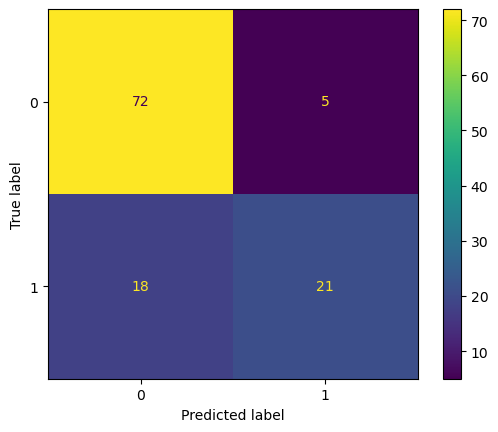

In [41]:
plot_confusion_matrix(log_model,x1_test,y1_test)

In [42]:
print(classification_report(y1_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.94      0.86        77
           1       0.81      0.54      0.65        39

    accuracy                           0.80       116
   macro avg       0.80      0.74      0.75       116
weighted avg       0.80      0.80      0.79       116



In [43]:
log_model = LogisticRegression()
log_model.fit(x2_train, y2_train)
y_pred = log_model.predict(x2_test)
print('accuracy : ',accuracy_score(y2_test, y_pred))

accuracy :  0.7931034482758621


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


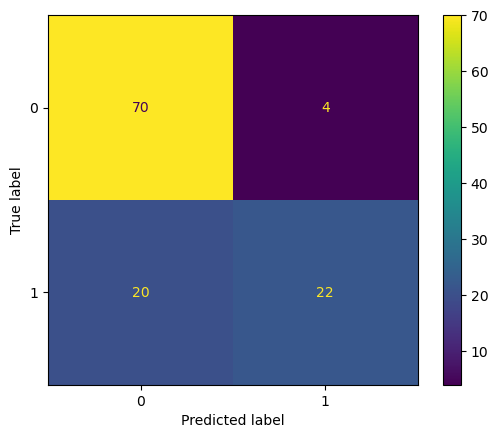

In [44]:
plot_confusion_matrix(log_model,x2_test,y2_test)

In [45]:
print(classification_report(y2_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.95      0.85        74
           1       0.85      0.52      0.65        42

    accuracy                           0.79       116
   macro avg       0.81      0.73      0.75       116
weighted avg       0.80      0.79      0.78       116



<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir"  size=3>
طبق کد های بالا، برای ساخت اولین مدل مقادیر گم شده را با مقدار مود و برای ساخت دومین مدل مقادیر گم شده را با مقدار میانگین پر کرده ایمو همانطور که میبینیم در کل دقت مدل تغییری نکرده است ولی معیاری های ارزشیابی برای مقدار Outcome صفر در مدل اول بهتر از مدل دوم است و برای مقدار Outcome یک در مدل دوم بهتر از مدل اول است.
</font>
</p>

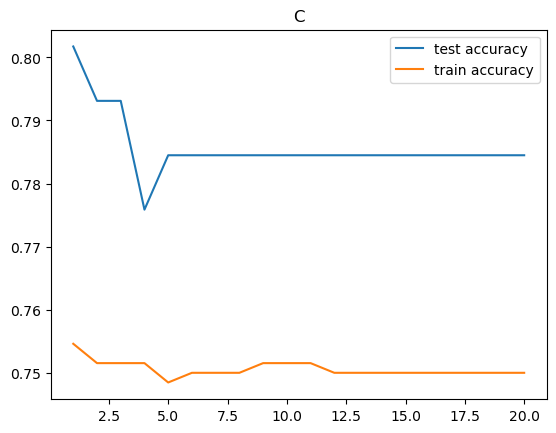

In [46]:
C = list(range(1, 21))
scores1 = []
scores2 = []
for i in C:
    model = LogisticRegression(C = i)
    model.fit(x1_train, y1_train)
    y_pred1 = model.predict(x1_test)
    y_pred2 = model.predict(x1_train)
    scores1.append(accuracy_score(y1_test, y_pred1))
    scores2.append(accuracy_score(y1_train, y_pred2))
plt.plot(C, scores1)
plt.plot(C, scores2)
plt.legend(["test accuracy", "train accuracy"])
plt.title('C')
plt.show()

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir"  size=3>
طبق شکل بالا بنظرم Underfit برای این مدل رخ داده است زیرا دیتای ترین نیز به خوبی آموزش ندیده است و خطای زیادی دارد.
</font>
</p>

In [47]:
log_model = LogisticRegression()
penalty = ['l1', 'l2']
C = range(1,10)
grid_model = GridSearchCV(log_model,param_grid={'C':C,'penalty':penalty})
grid_model.fit(x1_train, y1_train)
y_pred = grid_model.predict(x1_test)
print('accuracy : ',accuracy_score(y1_test, y_pred))
print(grid_model.best_estimator_)

accuracy :  0.8017241379310345
LogisticRegression(C=1)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
45 fits failed out of a total of 90.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
45 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, in _check_solver
    raise ValueError(
Valu

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


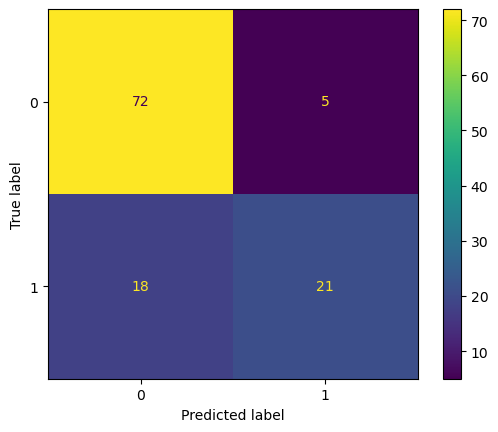

In [48]:
plot_confusion_matrix(grid_model,x1_test,y1_test)

In [49]:
print(classification_report(y1_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.94      0.86        77
           1       0.81      0.54      0.65        39

    accuracy                           0.80       116
   macro avg       0.80      0.74      0.75       116
weighted avg       0.80      0.80      0.79       116



### K-Nearest_Neighbours

In [50]:
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(x1_train,y1_train)
y_pred = knn_model.predict(x1_test)
print('accuracy : ',accuracy_score(y1_test,y_pred))

accuracy :  0.6982758620689655


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [51]:
print(classification_report(y1_test,y_pred))

              precision    recall  f1-score   support

           0       0.75      0.82      0.78        77
           1       0.56      0.46      0.51        39

    accuracy                           0.70       116
   macro avg       0.66      0.64      0.64       116
weighted avg       0.69      0.70      0.69       116



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

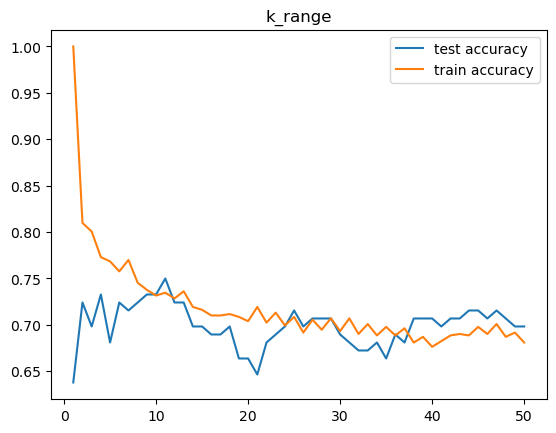

In [52]:
k_range = list(range(1, 51))
scores1 = []
scores2 = []
for i in k_range:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x1_train, y1_train)
    y_pred1 = knn.predict(x1_test)
    y_pred2 = knn.predict(x1_train)
    scores1.append(accuracy_score(y1_test, y_pred1))
    scores2.append(accuracy_score(y1_train, y_pred2))
plt.plot(k_range, scores1)
plt.plot(k_range, scores2)
plt.legend(["test accuracy", "train accuracy"])
plt.title('k_range')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


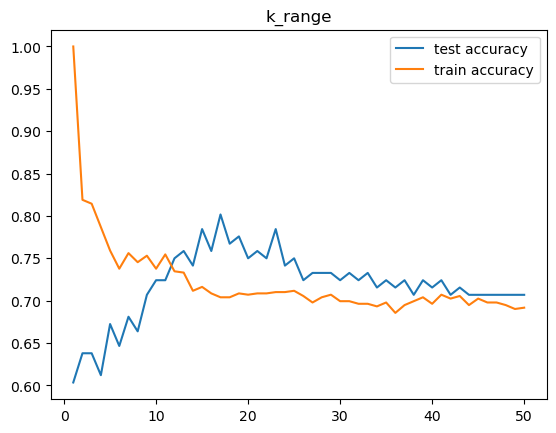

In [53]:
k_range = list(range(1, 51))
scores1 = []
scores2 = []
for i in k_range:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x2_train, y2_train)
    y_pred1 = knn.predict(x2_test)
    y_pred2 = knn.predict(x2_train)
    scores1.append(accuracy_score(y2_test, y_pred1))
    scores2.append(accuracy_score(y2_train, y_pred2))
plt.plot(k_range, scores1)
plt.plot(k_range, scores2)
plt.legend(["test accuracy", "train accuracy"])
plt.title('k_range')
plt.show()

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir"  size=3>
در دو شکل بالا ابتدا مقادیر Missing Values را با مقدار مود پر می کنیم و در شکل بعدی این مقادیر را با مقدار میانگین پر می کنیم.
می توانیم ببینیم که تغییر دادن در مرحله پیش پردازش دیتاها بر روی دقت مدل نیز تاثیر می گذارد.
</font>
</p>

In [68]:
knn_model = KNeighborsClassifier()
k_values = list(range(1,51))
param_grid = {'n_neighbors': k_values}
grid_model = GridSearchCV(knn_model, param_grid, scoring='accuracy')
grid_model.fit(x1_train,y1_train)
y_pred = grid_model.predict(x1_test)
accuracy_score(y1_test,y_pred)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

0.6982758620689655

In [69]:
grid_model.best_estimator_

KNeighborsClassifier(n_neighbors=3)

In [71]:
knn_model = KNeighborsClassifier()
k_values = list(range(1,51))
param_grid = {'n_neighbors': k_values}
grid_model = GridSearchCV(knn_model, param_grid, scoring='accuracy')
grid_model.fit(x2_train,y2_train)
y_pred = grid_model.predict(x2_test)
accuracy_score(y2_test,y_pred)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

0.7586206896551724

In [72]:
grid_model.best_estimator_

KNeighborsClassifier(n_neighbors=21)

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir"  size=3>
در دو قسمت بالا با استفاده از GridSearch بهترین پارامتر را برای مدل KNN پیدا کردیم و با استفاده از پر کردن مقادیر گم شده توسط مود و میانگین(به ترتیب) مدل را آموزش می دهیم و دقت را مشاهده می کنیم.
</font>
</p>

### Decision Tree

In [56]:
model = DecisionTreeClassifier(max_depth = 6)
model.fit(x1_train, y1_train)
base_pred = model.predict(x1_test)
accuracy_score(y1_test, base_pred)

0.6810344827586207

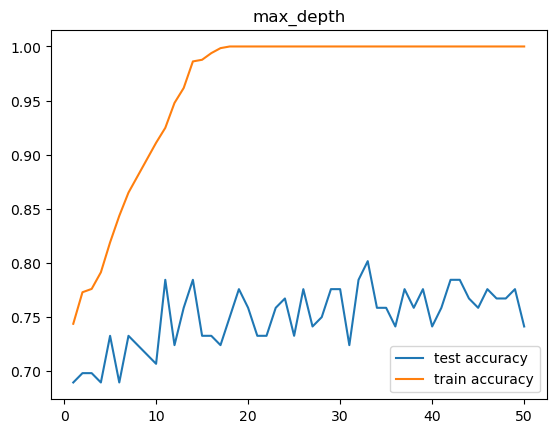

In [57]:
max_depth = list(range(1, 51))
scores1 = []
scores2 = []
for i in max_depth:
    model = DecisionTreeClassifier(max_depth = i)
    model.fit(x1_train, y1_train)
    y_pred1 = model.predict(x1_test)
    y_pred2 = model.predict(x1_train)
    scores1.append(accuracy_score(y1_test, y_pred1))
    scores2.append(accuracy_score(y1_train, y_pred2))
plt.plot(max_depth, scores1)
plt.plot(max_depth, scores2)
plt.legend(["test accuracy", "train accuracy"])
plt.title('max_depth')
plt.show()

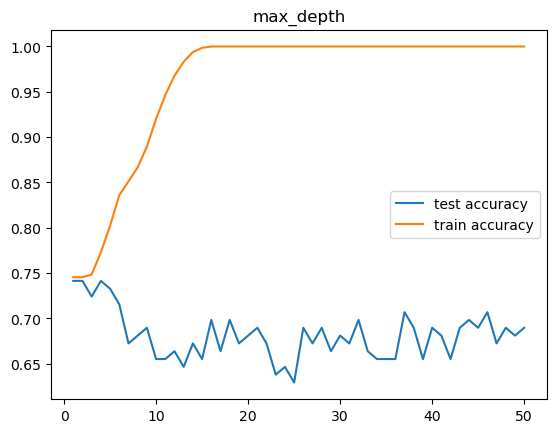

In [58]:
max_depth = list(range(1, 51))
scores1 = []
scores2 = []
for i in max_depth:
    model = DecisionTreeClassifier(max_depth = i)
    model.fit(x2_train, y2_train)
    y_pred1 = model.predict(x2_test)
    y_pred2 = model.predict(x2_train)
    scores1.append(accuracy_score(y2_test, y_pred1))
    scores2.append(accuracy_score(y2_train, y_pred2))
plt.plot(max_depth, scores1)
plt.plot(max_depth, scores2)
plt.legend(["test accuracy", "train accuracy"])
plt.title('max_depth')
plt.show()

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir"  size=3>
همانطور که در شکل های بالا می توانیم ببینیم برای این مدل که بر پایه Decision Tree ساخته شده است، Overfit رخ داده است و بنظرم دلیل آن می تواند کم بودن حجم دیتای ما باشد (حدود 700 سطر) بنابراین دیتای ترین ما به خوبی آموزش می بیند ولی دقت تست ما به مرور کم می شود.
    
همچنین در شکل اول مقادیر گم شده را با مقدار مود و در شکل دوم با مقدار میانگین پر کردیم و مشاهده می کنیم که در شکل دوم دقت مقداری کمتر شده است.
</font>
</p>

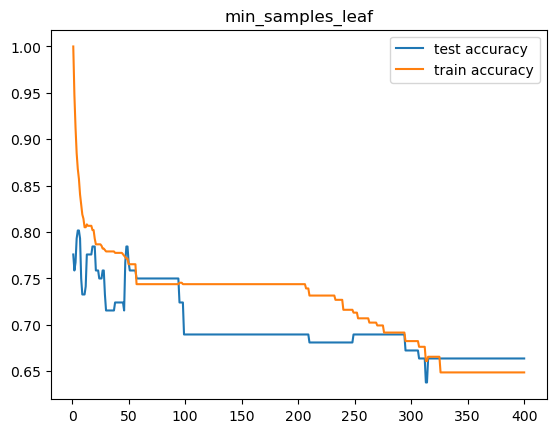

In [59]:
min_samples_leaf = list(range(1, 401))
scores1 = []
scores2 = []
for i in min_samples_leaf:
    model = DecisionTreeClassifier(min_samples_leaf= i)
    model.fit(x1_train, y1_train)
    y_pred1 = model.predict(x1_test)
    y_pred2 = model.predict(x1_train)
    scores1.append(accuracy_score(y1_test, y_pred1))
    scores2.append(accuracy_score(y1_train, y_pred2))
plt.plot(min_samples_leaf, scores1)
plt.plot(min_samples_leaf, scores2)
plt.legend(["test accuracy", "train accuracy"])
plt.title('min_samples_leaf')
plt.show()

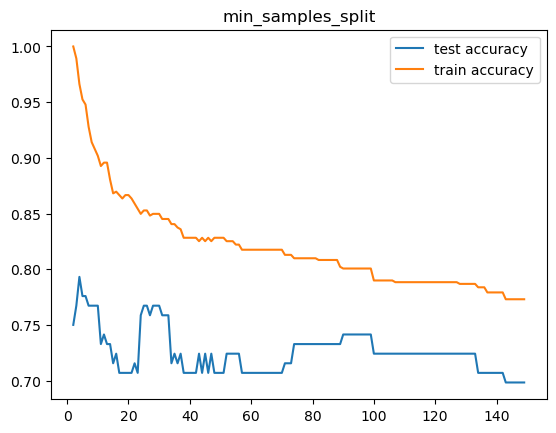

In [60]:
min_samples_split = list(range(2, 150))
scores1 = []
scores2 = []
for i in min_samples_split:
    model = DecisionTreeClassifier(min_samples_split= i)
    model.fit(x1_train, y1_train)
    y_pred1 = model.predict(x1_test)
    y_pred2 = model.predict(x1_train)
    scores1.append(accuracy_score(y1_test, y_pred1))
    scores2.append(accuracy_score(y1_train, y_pred2))
plt.plot(min_samples_split, scores1)
plt.plot(min_samples_split, scores2)
plt.legend(["test accuracy", "train accuracy"])
plt.title('min_samples_split')
plt.show()

In [61]:
model = DecisionTreeClassifier()
max_depth = list(range(1, 21))
criterion = ['gini', 'entropy']
min_samples_split = [2, 4, 5, 6, 7, 8, 10, 12, 14, 15, 16, 18, 20, 30]
param_grid = {'max_depth': max_depth , 'min_samples_split' : min_samples_split}
grid_model = GridSearchCV(model, param_grid, scoring='accuracy')
grid_model.fit(x1_train,y1_train)
y_pred = grid_model.predict(x1_test)
print('accuracy : ',accuracy_score(y1_test,y_pred))
print(grid_model.best_params_)

accuracy :  0.6982758620689655
{'max_depth': 3, 'min_samples_split': 4}


<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir"  size=3>
قابل ذکر است که در قسمت های بالا برخی از پیش پردازش های انجام شده را تغییر داده ایم تا تاثیر آن بر روی دقت مدلمان را بسنجیم. 
</font>
</p>

# روش های یادگیری جمعی

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir"  size=3>
یکی از مشکلات Decision Tree ها این است که تمایل دارند که داده های ترین را خیلی خوب یاد بگیرند و کاملا با آن ها fit شود(Overfitting). یک روش برای حل این مشکل استفاده از Random Forest می باشد. در این مدل، چندین درخت تصمیم train می شوند، اما هر درخت فقط یک نمونه از داده ها را دریافت می کند و هر گره فقط زیرمجموعه ای از ویژگی ها را هنگام تعیین بهترین تقسیم در نظر می گیرد. این جنگل از درختان تصمیم تصادفی برای تعیین کلاس پیش بینی شده انتخاب می کند. این مدل پارامترهای زیادی دارد که در زیر به چند تا از آنها اشاره می کنیم :
    
n_estimators = تعداد درختان تصمیم برای گنجاندن در جنگل

max_depth = حداکثر عمق درخت

min_samples_leaf = حداقل تعداد داده های لازم برای یک برگ
    
min_samples_split = حداقل تعداد داده ها در یک گره قبل از تقسیم آن گره.
</font>
</p>

In [62]:
randomforest = RandomForestClassifier(n_estimators = 100, max_depth=2)
randomforest.fit(x1_train, y1_train)
y_pred = randomforest.predict(x1_test)
accuracy_score(y1_test, y_pred)

0.7327586206896551

In [63]:
randomforest.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 2,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

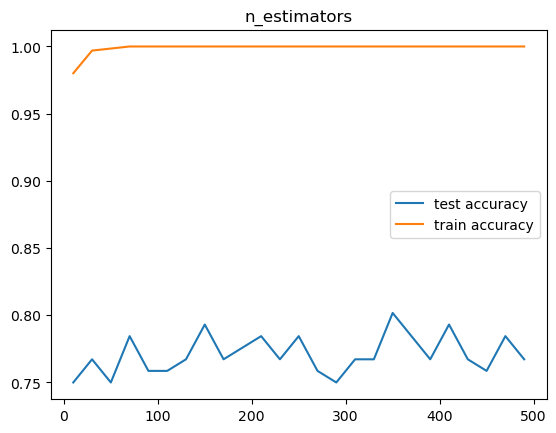

In [64]:
n_estimators = np.arange(10,500,20)
scores1 = []
scores2 = []
for n in n_estimators:
    randomforest = RandomForestClassifier(n_estimators=n)
    randomforest.fit(x1_train,y1_train)
    y_pred1 = randomforest.predict(x1_test)
    y_pred2 = randomforest.predict(x1_train)
    scores1.append(accuracy_score(y1_test, y_pred1))
    scores2.append(accuracy_score(y1_train, y_pred2))
plt.plot(n_estimators, scores1)
plt.plot(n_estimators, scores2)
plt.legend(["test accuracy", "train accuracy"])
plt.title('n_estimators')
plt.show()

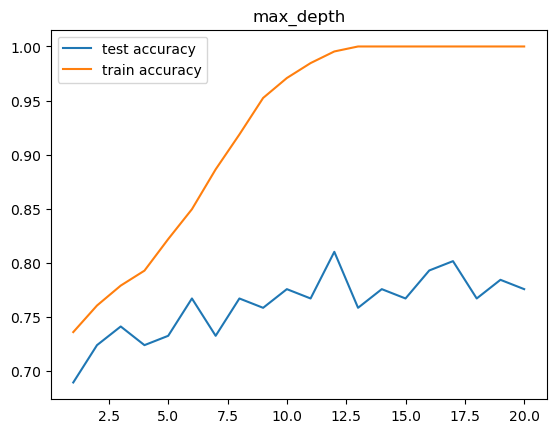

In [73]:
max_depth = list(range(1, 21))
scores1 = []
scores2 = []
for i in max_depth:
    randomforest = RandomForestClassifier(max_depth = i)
    randomforest.fit(x1_train,y1_train)
    y_pred1 = randomforest.predict(x1_test)
    y_pred2 = randomforest.predict(x1_train)
    scores1.append(accuracy_score(y1_test, y_pred1))
    scores2.append(accuracy_score(y1_train, y_pred2))   
plt.plot(max_depth, scores1)
plt.plot(max_depth, scores2)
plt.legend(["test accuracy", "train accuracy"])
plt.title('max_depth')
plt.show()

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir"  size=3>
همانطور که در شکل بالا می بینیم دقت مدل Randomforest بر اساس تغییر max_depth رسم شده است. مشاهده می شود که بر خلاف درخت تصمیم گیری، در این مدل Overfitting رخ نداده است و مدل به خوبی ترین شده است و به دقت خوبی نیز رسیده است. 
</font>
</p>

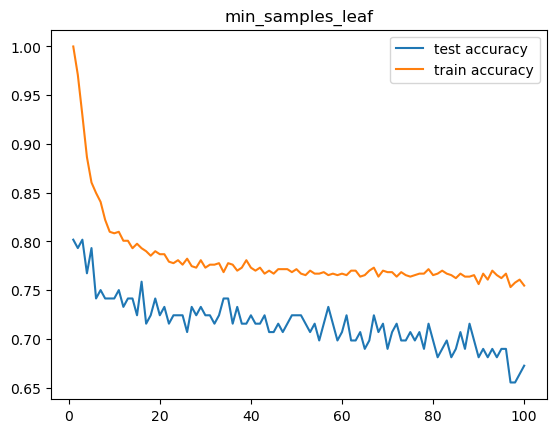

In [66]:
min_samples_leaf = list(range(1, 101))
scores1 = []
scores2 = []
for i in min_samples_leaf:
    randomforest = RandomForestClassifier(min_samples_leaf = i)
    randomforest.fit(x1_train,y1_train)
    y_pred1 = randomforest.predict(x1_test)
    y_pred2 = randomforest.predict(x1_train)
    scores1.append(accuracy_score(y1_test, y_pred1))
    scores2.append(accuracy_score(y1_train, y_pred2))   
plt.plot(min_samples_leaf, scores1)
plt.plot(min_samples_leaf, scores2)
plt.legend(["test accuracy", "train accuracy"])
plt.title('min_samples_leaf')
plt.show()

In [67]:
randomforest = RandomForestClassifier()
max_depth = list(range(1, 15))
n_estimators = [100, 200, 300]
param_grid = {'max_depth' : max_depth, 'n_estimators' : n_estimators}
grid_model = GridSearchCV(randomforest, param_grid, scoring='accuracy')
grid_model.fit(x1_train,y1_train)
y_pred = grid_model.predict(x1_test)
print('accuracy : ',accuracy_score(y1_test,y_pred))
print(grid_model.best_params_)

accuracy :  0.7327586206896551
{'max_depth': 4, 'n_estimators': 100}


### Variance and Bias

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir"  size=3>
وقتی مدل ما بسیار پیچیده باشد و در واقع Overfit شده باشد، اصطلاحا در اینجا variance بالایی داریم به این معنی که مدل ما دارای پیچیدگی بالایی بوده و در عین حال که می تواند طبقه بندی را بر روی داده های train موجود بسیار درست انجام  دهد، ولی اگر یک داده ی جدید را مشاهده کند، ممکن است خطای زیادی داشته باشد.

وقتی در یک مدل bias زیادی داشته باشیم یعنی مدل ما چه در داده های train و چه در داده های test یک خطای نسبی دارد و در واقع Underfitting رخ داده است.

مفهومی به اسم تعادل بین variance و bias داریم(tradeoff) که می گوید باید یک تعادل معقولی بین bias و varince یعنی بین سادگی زیاد مدل و پیچیدگی زیاد آن برقرار شود تا یک مدل خوب داشته باشیم. برای رسیدن به این تعادل راهکار های مختلفی وجود دارد. یکی از آن ها این است که داده های خود را به دو بخش train و test تقسیم کنیم.

با توجه به عملکرد مدل Randomforest می توانیم با استفاده از درخت تصمیم های مختلف، یک مدل با واریانس و بایاس پایین درست کنیم  که در واقع یک tradeoff ای بین بایاس و واریانس خواهیم داشت. بنابراین بنظرم از لحاظ این دو مورد، مدل Randomforest بهتر از Decision Tree عمل می کند. 

همچنین نتایجی که در بالا مشاهده کردیم می تواند صحتی بر روی حرف های ما بگذارد. همانطور که میبینیم مدل Randomforest باعث از بین بردن Overfitting و همچنین طبق نمودار min_samples_leaf می توانیم ببینیم که به وضوح واریانس کمتر شده است.
</font>
</p>